***Importing the libraries***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import folium

***Loading the AIRBNB dataset***


In [4]:
df_air = pd.read_csv(r'C:\Users\ACER\Desktop\PYTHON_PROJECT\Airbnb NYC 2019.csv')
df_air

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

***Data Exploration and Data Cleaning***

In [6]:
df_air.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [7]:
df_air.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [8]:
# Basic information(datatype) about the dataset

df_air.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**So, host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.**

**While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables.**



In [10]:
df_air.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [11]:
#checking what are the variables here:

df_air.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [12]:
df_air.shape

(48895, 16)

In [13]:
df_air.size

782320

In [14]:
# Check duplicate row in Dataset
# So, there is no any duplicate rows in Dataset.

df_air = df_air.drop_duplicates()
df_air.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [15]:
# Checking null values of each columns

df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**host_name and listing_name are not that much of null values, so first we are good to fill those with some substitutes in both the columns first.**



In [17]:
df_air['name'].fillna('unknown', inplace=True)
df_air['host_name'].fillna('unknown', inplace=True)

In [18]:
# So the null values are removed
df_air[['name', 'host_name']].isnull().sum()

name         0
host_name    0
dtype: int64

**Now the columns last_review and reviews_per_moonth have total 10052 null values each.**

In [20]:
# Dropping last_review
df_air = df_air.drop(['last_review'], axis=1, errors='ignore')

In [21]:
# The last_review column is deleted.
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

**The reviews_per_month column also containing null values and we can simple put 0 reviews by replacing NAN's.**

In [23]:
df_air['reviews_per_month'] = df_air['reviews_per_month'].replace(to_replace=np.nan, value=0).astype('int64')

In [24]:
# The null values are replaced by 0 value
df_air['reviews_per_month'].isnull().sum()

0

**So there is no null values now in 'reviews_per_month' column because we replaced null value by 0 value.**

**Check Unique Value for variables and doing some experiments.**

In [27]:
# Check unique values for listing/property Id's.
df_air['id'].nunique()

48895

In [28]:
# Check unique values for neighbourhood.
df_air['neighbourhood'].nunique()

221

In [29]:
# Check unique values for neighbourhood_group.
df_air['neighbourhood_group'].nunique()

5

In [30]:
# Check unique values for listing/property names.
df_air['name'].nunique()

47906

**So,
There are 48,895 unique listing IDs.
There are 221 unique neighborhoods.
There are 5 unique neighborhood groups.
There are 11,453 unique hosts.
There are 47,906 unique listing names.**

In [32]:
# So here same host David operates different 402 listing/property.
df_air[df_air['host_name']=='David']['name'].nunique()

402

In [33]:
# There are few listings where the listing/property name and the host have same names.
df_air[df_air['name']==df_air['host_name']].head()

id            name    host_id       host_name  \
9473    7264659         Olivier    6994503         Olivier   
10682   8212051           Monty   43302952           Monty   
16422  13186374            Sean   35143476            Sean   
23996  19348168             Cyn   74033595             Cyn   
24152  19456810  Hillside Hotel  134184451  Hillside Hotel   

      neighbourhood_group       neighbourhood  latitude  longitude  \
9473            Manhattan     Upper West Side  40.78931  -73.97520   
10682            Brooklyn       East Flatbush  40.66383  -73.92706   
16422            Brooklyn     Windsor Terrace  40.65182  -73.98043   
23996            Brooklyn  Bedford-Stuyvesant  40.67850  -73.91478   
24152              Queens           Briarwood  40.70454  -73.81549   

             room_type  price  minimum_nights  number_of_reviews  \
9473   Entire home/apt    200               5                 12   
10682      Shared room     95               2                  7   
16422  Entire home/apt    400               7                  0   
23996     Private room     75               2                  1   
24152     Private room     93               1                  2   

       reviews_per_month  calculated_host_listings_count  availability_365  
9473                   0                               1                25  
10682                  0                               1               238  
16422                  0                               1                 0  
23996                  0                               1                 0  
24152                  0                              18                90

In [34]:
df_air.loc[(df_air['neighbourhood_group']=='Queens') & (df_air['host_name']=='Alex')].head()

id                                name   host_id host_name  \
3523   2104910  SPACIOUS APT BK/QUEENS w/BACKYARD!  10643810      Alex   
4512   3116519   Large 900 sqft Artist's Apartment   3008690      Alex   
6178   4518242              Zen MiniPalace Astoria  23424461      Alex   
10543  8090529         Modern studio in Queens, NY  17377835      Alex   
10681  8211513    Cozy Room, In Quiet Neighborhood  43299973      Alex   

      neighbourhood_group neighbourhood  latitude  longitude        room_type  \
3523               Queens     Ridgewood  40.70988  -73.90845  Entire home/apt   
4512               Queens     Ridgewood  40.70124  -73.90941  Entire home/apt   
6178               Queens       Astoria  40.76369  -73.91601  Entire home/apt   
10543              Queens     Sunnyside  40.74674  -73.91881  Entire home/apt   
10681              Queens     Ridgewood  40.70468  -73.90553     Private room   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
3523      99               2                 57                  0   
4512      70              10                  0                  0   
6178      80               1                  3                  0   
10543    250               3                  0                  0   
10681     40               2                  1                  0   

       calculated_host_listings_count  availability_365  
3523                                1                42  
4512                                1                 0  
6178                                1                 0  
10543                               1               364  
10681                               1                 0

In [35]:
# Same host have hosted different listing/property in different or same in neighbourhood groups.
# like Alex hosted different listings in most of different neighbourhood and there are same also in Queens neighbourhood group.

df_air.loc[(df_air['neighbourhood_group']=='Queens') & (df_air['host_name']=='Alex')].head(4)

id                                name   host_id host_name  \
3523   2104910  SPACIOUS APT BK/QUEENS w/BACKYARD!  10643810      Alex   
4512   3116519   Large 900 sqft Artist's Apartment   3008690      Alex   
6178   4518242              Zen MiniPalace Astoria  23424461      Alex   
10543  8090529         Modern studio in Queens, NY  17377835      Alex   

      neighbourhood_group neighbourhood  latitude  longitude        room_type  \
3523               Queens     Ridgewood  40.70988  -73.90845  Entire home/apt   
4512               Queens     Ridgewood  40.70124  -73.90941  Entire home/apt   
6178               Queens       Astoria  40.76369  -73.91601  Entire home/apt   
10543              Queens     Sunnyside  40.74674  -73.91881  Entire home/apt   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
3523      99               2                 57                  0   
4512      70              10                  0                  0   
6178      80               1                  3                  0   
10543    250               3                  0                  0   

       calculated_host_listings_count  availability_365  
3523                                1                42  
4512                                1                 0  
6178                                1                 0  
10543                               1               364

**Describing the dataset and removing outliers**

In [37]:
df_air.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           0.806258   
std         20.510550          44.550582           1.502767   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.000000   
50%          3.000000           5.000000           0.000000   
75%          5.000000          24.000000           1.000000   
max       1250.000000         629.000000          58.000000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

**Price column is very essential column so we have to find and remove outliers in important columns first.**

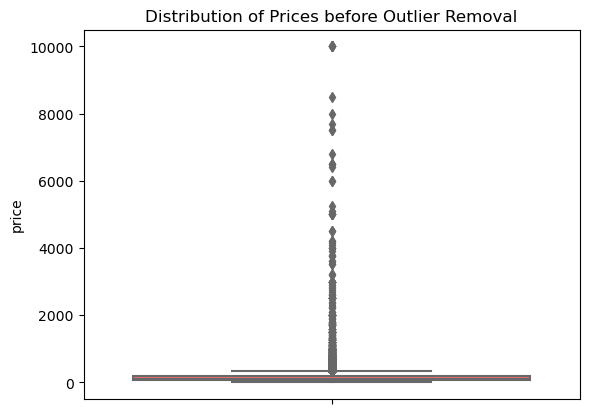

In [39]:
# Box plot to show ditribution of prices before outlier removal

sns.boxplot(y=df_air['price'], color='#FF5A5F')
plt.title('Distribution of Prices before Outlier Removal')
plt.show()

**IQR Method**

In [41]:
df_air['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [42]:
# Defining the IQR function to calculate lower and upper fences.

def iqr_func(dfcolumn):
    Q1 = np.percentile(dfcolumn, 25)
    Q3 = np.percentile(dfcolumn, 75)
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5 * IQR)
    lower_fence = Q1 - (1.5 * IQR)
    return lower_fence, upper_fence

In [43]:
# Calling the lower and upper bounds for the 'price' column
lower_fence, upper_fence = iqr_func(df_air['price'])

# Removing outliers. 
df_air = df_air[(df_air['price'] >= lower_fence) & (df_air['price'] <= upper_fence)]

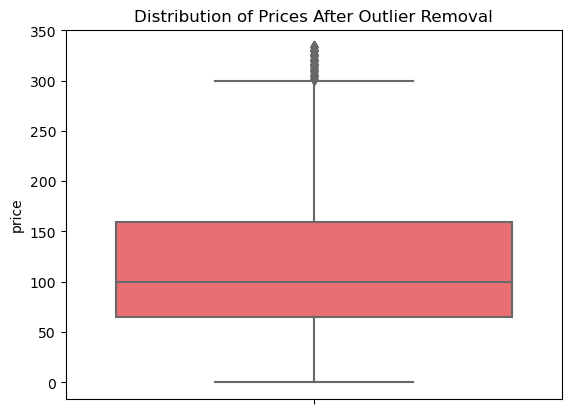

In [44]:
# Boxplot to show distribution of prices after outlier removal.

sns.boxplot(y=df_air['price'], color='#FF5A5F')
plt.title('Distribution of Prices After Outlier Removal')
plt.show()

In [45]:
# Display the summary statistics of the 'price' column without outliers

df_air['price'].describe()

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

In [46]:
print(df_air['price'].max())

334


<font size="8">**Data Visualization**</font>

**(1) Distribution of Airbnb Bookings Price Range Using Histogram**

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


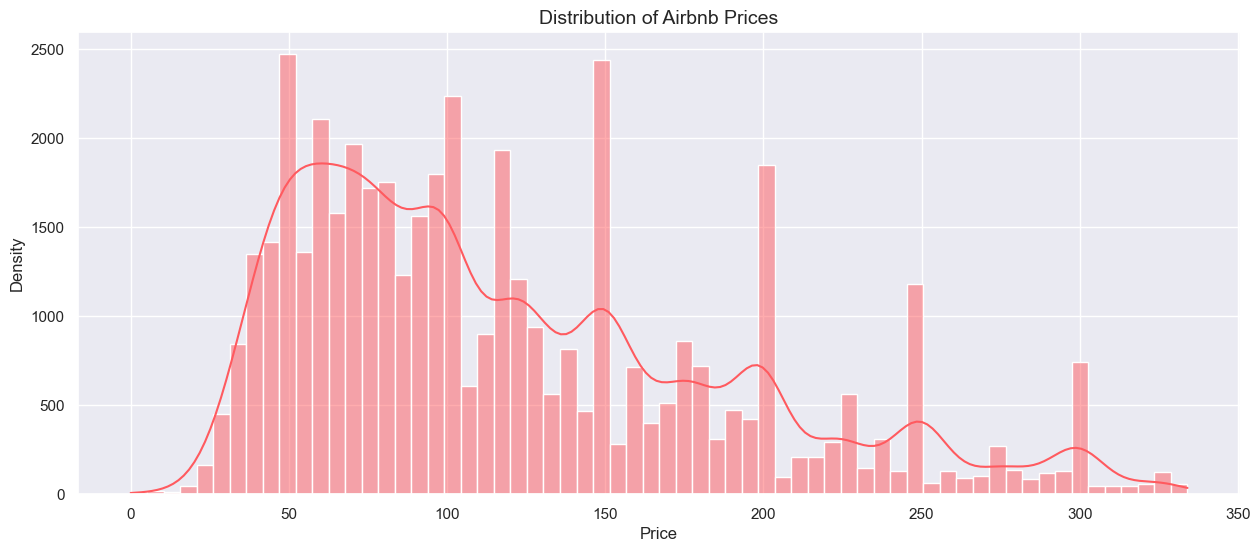

In [49]:
# Plotting histogram for Price analysis

plt.figure(figsize=(15,6))

sns.set_theme(style='darkgrid')

# Replace infinite values with NaN

df_air['price'].replace([np.inf, -np.inf], np.nan, inplace=True)

sns.histplot(df_air['price'], color='#FF5A5F', kde=True)

plt.xlabel('Price', fontsize=12)

plt.ylabel('Density', fontsize=12)

plt.title('Distribution of Airbnb Prices', fontsize=14)

plt.show()

<font size=6>**Insights**</font>

- **The range of prices extends from 20 dollars to 300 dollars, with most listings priced between 50 and 150 dollars.**

- **Most listings are priced in the 50 to 150 dollars range, and there are fewer listings at bith lower and higher prices.**

- **There are fewer listings above 250 dollars, as the number of listings drop significantly in this price range.**


**(2) Total Listing/Property count in each neighbourhood group using bar plot.**

In [52]:
# Counting the number of listings in each neighborhood group.

# Defining a variable to store values of neighbourhood_group.

Top_Neighbourhood_group = df_air['neighbourhood_group'].value_counts().reset_index()

# Rename the columns for clarity

Top_Neighbourhood_group.columns = ['Neighbourhood_Groups', 'Listing_Counts']

Top_Neighbourhood_group

Neighbourhood_Groups  Listing_Counts
0            Manhattan           19506
1             Brooklyn           19415
2               Queens            5567
3                Bronx            1070
4        Staten Island             365

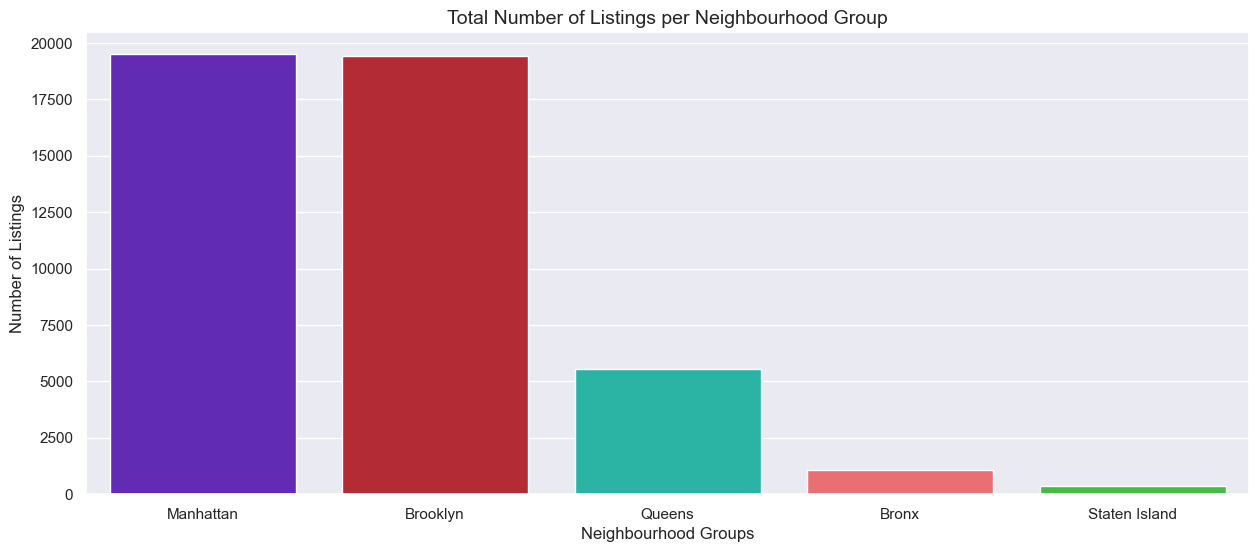

In [53]:
# Bar plot to show total number of listings.

plt.figure(figsize=(15,6))

sns.barplot(x='Neighbourhood_Groups', y='Listing_Counts', data=Top_Neighbourhood_group, palette =['#5d14ca','#ca1422', '#14cab6', '#FF5A5F', '#32CD32'])

plt.xlabel('Neighbourhood Groups', fontsize=12)

plt.ylabel('Number of Listings', fontsize=12)

plt.title('Total Number of Listings per Neighbourhood Group', fontsize=14)

plt.show()

<font size=6>**Insights**</font>

- **Manhattan and Brooklyn** **have the most listings on Airbnb with over 19,000 listings.**

- **Queens** **and** **the Bronx** **have fewer listings, with 5,567 and 1,070 listings.**

- **State Island has the least number of listings with only 365.**

- **Queens, Bronx and State Island are larger in size, they have fewer listings than Manhattan.**

- **Therefore, Manhattan has higher demand for Airbnb rentals than other groups.**

**(3) Average Price of Each Neighbourgood Groupd using line chart.**

In [56]:
# Group by 'neighbourhood_group' and calculate the mean price.

neighbourhood_group_avg_price = df_air.groupby('neighbourhood_group')['price'].mean().reset_index()

# Rename the "price" column to "avg_price"

neighbourhood_group_avg_price = neighbourhood_group_avg_price.rename(columns={'price':'avg_price'})

neighbourhood_group_avg_price['avg_price'] = neighbourhood_group_avg_price['avg_price'].round(2)

print(neighbourhood_group_avg_price)

  neighbourhood_group  avg_price
0               Bronx      77.37
1            Brooklyn     105.70
2           Manhattan     145.95
3              Queens      88.90
4       Staten Island      89.24


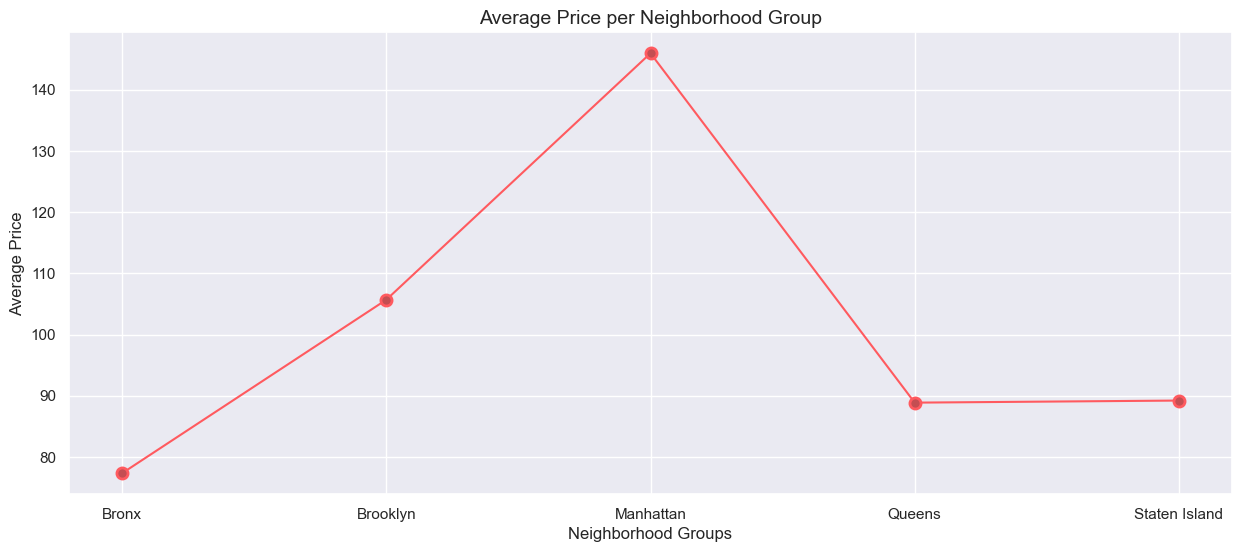

In [57]:
# Showing average price per neighborhood groups

plt.figure(figsize=(15, 6))

plt.plot(neighbourhood_group_avg_price['neighbourhood_group'],
         neighbourhood_group_avg_price['avg_price'],
         marker='o', color = '#FF5A5F', markersize=8, linestyle='-', markerfacecolor='r', markeredgewidth=2)

plt.xlabel('Neighborhood Groups', fontsize=12)

plt.ylabel('Average Price', fontsize=12)

plt.title('Average Price per Neighborhood Group', fontsize=14)

plt.show()

<font size=6>**Insights**</font>

- **Manhattan has the highest average price at 140 dollars per day while Bronx has the lowest at 74 dollars per day.**

- **Manhattan and Brooklyn have high price variations showing the most diversity in pricing.**

- **Queens and State Island have similar average prices, despite being in different parts of the city.**

- **Manhattan is the most expensive due to high demand, while outer groups like Bronx and State Island are more affordable.**

**(4) Top Neighbourhoos by Listings/Property using Bar plot.**

In [60]:
# Creating a new dataframe that displays the top 10 neighbourhoods in the Airbnb NYC dataset based on the number of listings in each neighbourhood.

Top_Neighbourhoods = df_air['neighbourhood'].value_counts()[:10].reset_index()

# Renaming the columns of the resulting dataframe to 'Top_Neighbourhoods' and 'Listing_Counts'
Top_Neighbourhoods.columns = ['Top_Neighbourhoods', 'Listing_Counts']

Top_Neighbourhoods

Top_Neighbourhoods  Listing_Counts
0        Williamsburg            3732
1  Bedford-Stuyvesant            3638
2              Harlem            2585
3            Bushwick            2438
4     Upper West Side            1788
5      Hell's Kitchen            1731
6        East Village            1714
7     Upper East Side            1670
8       Crown Heights            1519
9             Midtown            1144

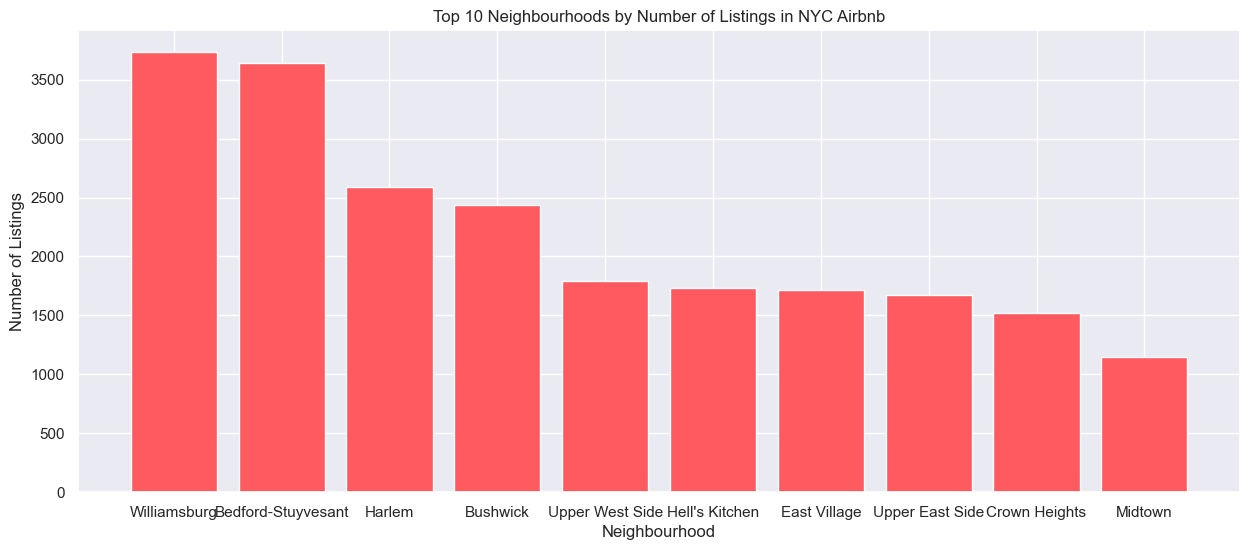

In [61]:
# Plotting the bar chart to show Top Neighbourhoods.

plt.figure(figsize=(15,6))

plt.bar(Top_Neighbourhoods['Top_Neighbourhoods'], Top_Neighbourhoods['Listing_Counts'], color= '#FF5A5F')

plt.xlabel('Neighbourhood')

plt.ylabel('Number of Listings')

plt.title('Top 10 Neighbourhoods by Number of Listings in NYC Airbnb')

plt.show()

<font size=6>**Insights**</font>

-**The neighborhoods with the most Airbnb listings are Bedford-Stuyvesant (1653), Williamsburg (1526), Harlem (1216), Bushwick (1122), and Hell's Kitchen (847).**

-**Popular areas like Upper East Side (758), Upper West Side (739), and East Village (722) also have significant listings.**

-**Emerging neighborhoods such as Crown Heights (653) and Greenpoint (536) are showing increasing interest.**

-**The top neighborhoods are mostly in Brooklyn and Manhattan, which are the most densely populated boroughs in NYC with high housing demand.**

-**The number of listings reflects popularity but doesn't necessarily indicate full demand, as factors like cost of living and housing availability also play a role.**

**(5) Top hosts with more Listing/Property using bar chart.**

In [64]:
# Creating a new dataframe that displays the top 10 hosts in the Airbnb NYC datset based on the number of listings.

top_10_hosts = df_air['host_name'].value_counts()[:10].reset_index()

# rename the columns of the resulting DataFrame to 'host_name' and 'Total_listings'

top_10_hosts.columns = ['host_name', 'Total_listings']

top_10_hosts

host_name  Total_listings
0       Michael             383
1         David             368
2          John             276
3  Sonder (NYC)             272
4          Alex             253
5         Sarah             221
6        Daniel             212
7         Maria             197
8       Jessica             185
9          Mike             184

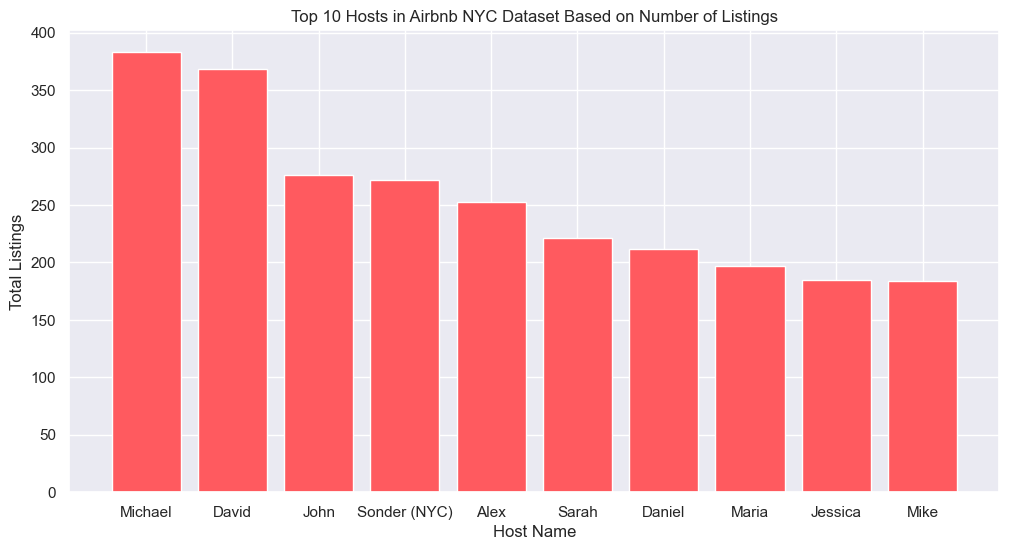

In [65]:
# Plot the bar chart to show top 1 Hosts.

plt.figure(figsize=(12, 6))

plt.bar(top_10_hosts['host_name'], top_10_hosts['Total_listings'], color='#FF5A5F')

plt.xlabel('Host Name')

plt.ylabel('Total Listings')

plt.title('Top 10 Hosts in Airbnb NYC Dataset Based on Number of Listings')

plt.show()

<font size=6>**Insights**</font>

- **The top three hosts with the most listings are Michael (184), David (172), and John (135).**

- **Michael and David have far more listings than most other hosts.**

- **There's a big range in how many listings each host has—for example, Michael has 184, while another host, Mike, has only 94.**

- **A few hosts control many listings, making the Airbnb market competitive.**

- **Some hosts, like Sonder (NYC), have many listings, possibly because they have more resources or better branding.**

**(6) Number Of Active Hosts Per Location Using Line Chart.**

In [68]:
# create a new DataFrame that displays the number of hosts in each neighborhood group in the Airbnb NYC dataset
hosts_per_location = df_air.groupby('neighbourhood_group')['id'].count().reset_index()

# rename the columns of the resulting DataFrame to 'Neighbourhood_Groups' and 'Host_counts'
hosts_per_location.columns = ['Neighbourhood_Groups', 'Host_counts']

# display the resulting DataFrame
hosts_per_location

Neighbourhood_Groups  Host_counts
0                Bronx         1070
1             Brooklyn        19415
2            Manhattan        19506
3               Queens         5567
4        Staten Island          365

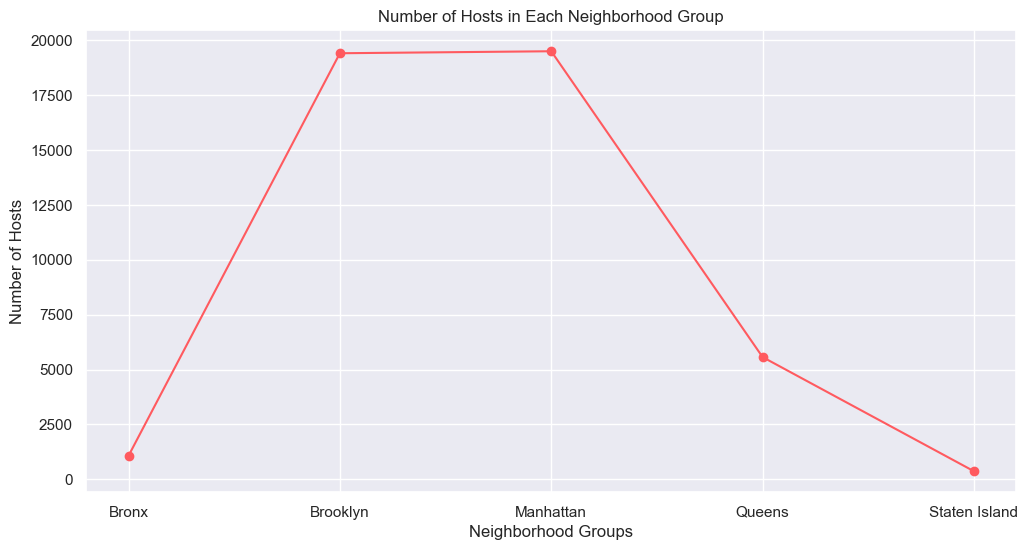

In [69]:
# Plot the line chart

plt.figure(figsize=(12, 6))

plt.plot(hosts_per_location['Neighbourhood_Groups'], hosts_per_location['Host_counts'], marker='o', color='#FF5A5F', linestyle='-')

plt.xlabel('Neighborhood Groups')

plt.ylabel('Number of Hosts')

plt.title('Number of Hosts in Each Neighborhood Group')

plt.show()

<font size=6>**Insights**</font>

-**Manhattan has the largest number of hosts with 8588,Brooklyn has the second largest number of hosts with 8656.**


-**After that Queens with 2579 and the Bronx with 522 while Staten Island has the fewest with 185.**

-**Brooklyn and Manhattan have the largest number of hosts, with more than double the number of hosts in Queens and more than 18 times the number of hosts in the Bronx.**

**(7) Average Minimum Price In Neighborhoods using Scatter and Bar chart.**

In [72]:
# Calculate the average price of Airbnb rentals in each neighborhood
neighbourhood_avg_price = df_air.groupby("neighbourhood")["price"].mean()

# Create a new DataFrame with the average price for each neighborhood
neighbourhood_prices = pd.DataFrame({"neighbourhood": neighbourhood_avg_price.index, "avg_price": neighbourhood_avg_price.values})

# Merge the average price data with the original DataFrame to get latitude and longitude
df_with_avg_price = df_air.merge(neighbourhood_prices, on="neighbourhood")

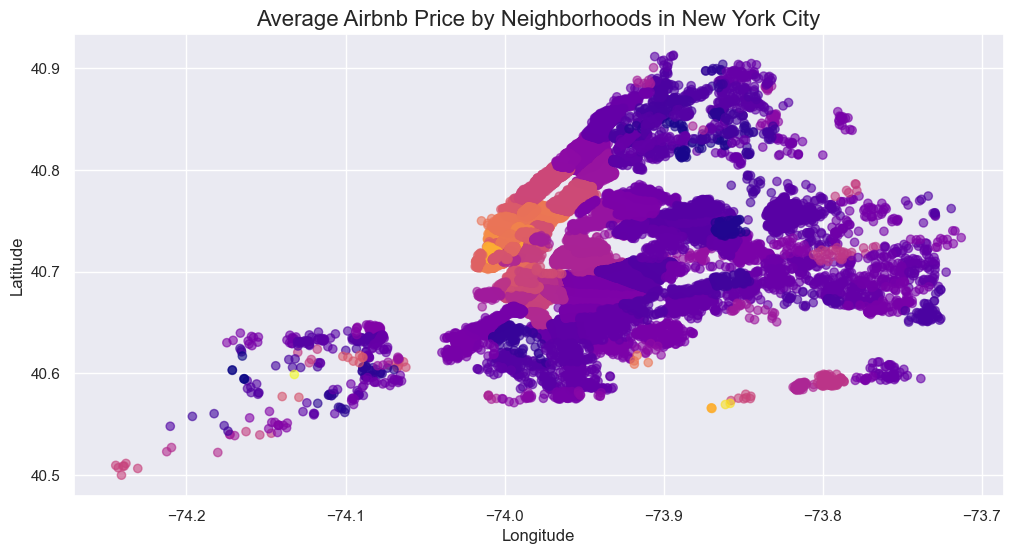

In [73]:
# Scatter plot to show average price by Neighbourhoods.

fig, ax = plt.subplots(figsize=(12, 6))

scatter = ax.scatter(x=df_with_avg_price["longitude"], y=df_with_avg_price["latitude"], c=df_with_avg_price["avg_price"], cmap="plasma", alpha=0.6)

ax.set_title("Average Airbnb Price by Neighborhoods in New York City", fontsize=16)

ax.set_xlabel("Longitude", fontsize=12)

ax.set_ylabel("Latitude", fontsize=12)

plt.show()

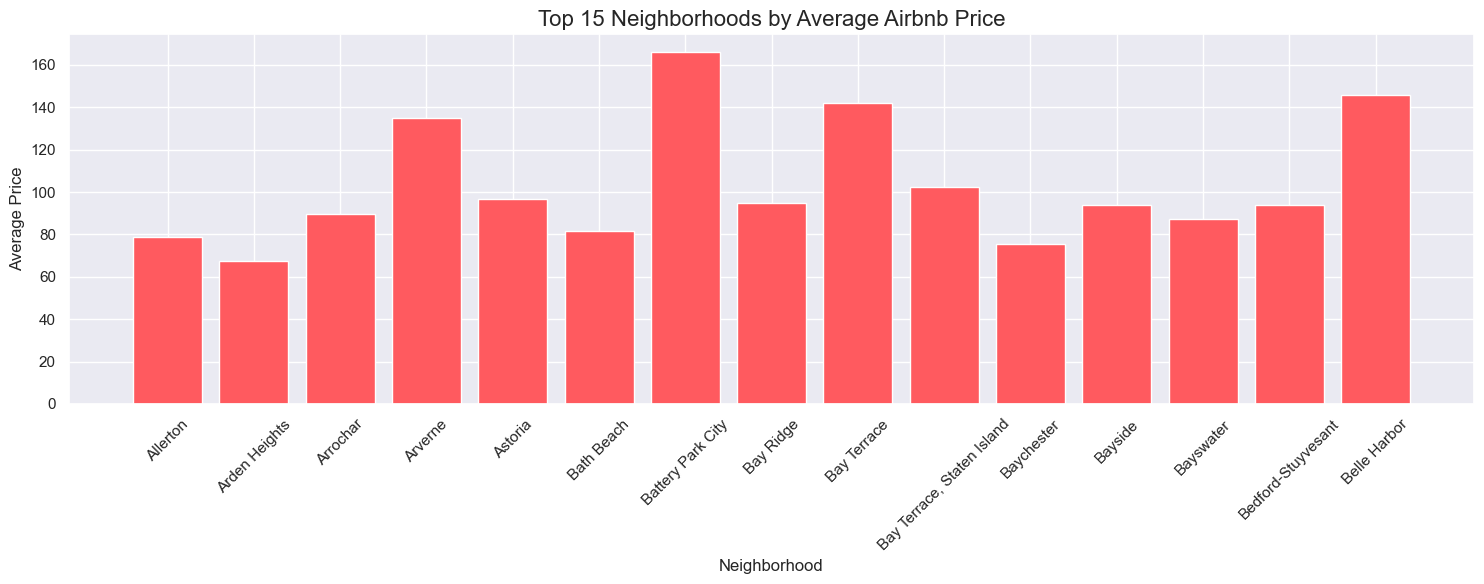

In [74]:
# Showing top 15 neighborhoods by average price

top_15_neighbourhood_prices = neighbourhood_prices.head(15)

neighbourhoods = top_15_neighbourhood_prices['neighbourhood']

prices = top_15_neighbourhood_prices['avg_price']

plt.figure(figsize=(15, 6))

plt.bar(neighbourhoods, prices, color='#FF5A5F')

plt.xlabel('Neighborhood', fontsize=12)

plt.ylabel('Average Price', fontsize=12)

plt.title('Top 15 Neighborhoods by Average Airbnb Price', fontsize=16)

plt.xticks(rotation=45)  # Slight rotation for readability

plt.tight_layout()

plt.show()

<font size=6>**Insights**</font>

- **Some neighborhoods have higher Airbnb prices due to their proximity to tourist attractions or unique features.**

- **There's a clear price gap, with luxury areas costing more than budget-friendly ones.**

- **Scenic or culturally rich areas also have higher prices.**

- **Seasonal demand can affect prices, with hosts adjusting rates accordingly. Overall, location and timing are key factors in determining Airbnb prices.**

**(8) Total Counts Of Each Room Type.**

In [77]:
# Create a new dataframe that displays the number of listings of each room type in the Airbnb NYC dataset.

top_room_type = df_air['room_type'].value_counts().reset_index()

# Rename the columns of the resulting dataframe to 'Room_Type' and 'Total_counts'.
top_room_type.columns = ['Room_Type', 'Total_counts']

top_room_type

Room_Type  Total_counts
0  Entire home/apt         22789
1     Private room         21996
2      Shared room          1138

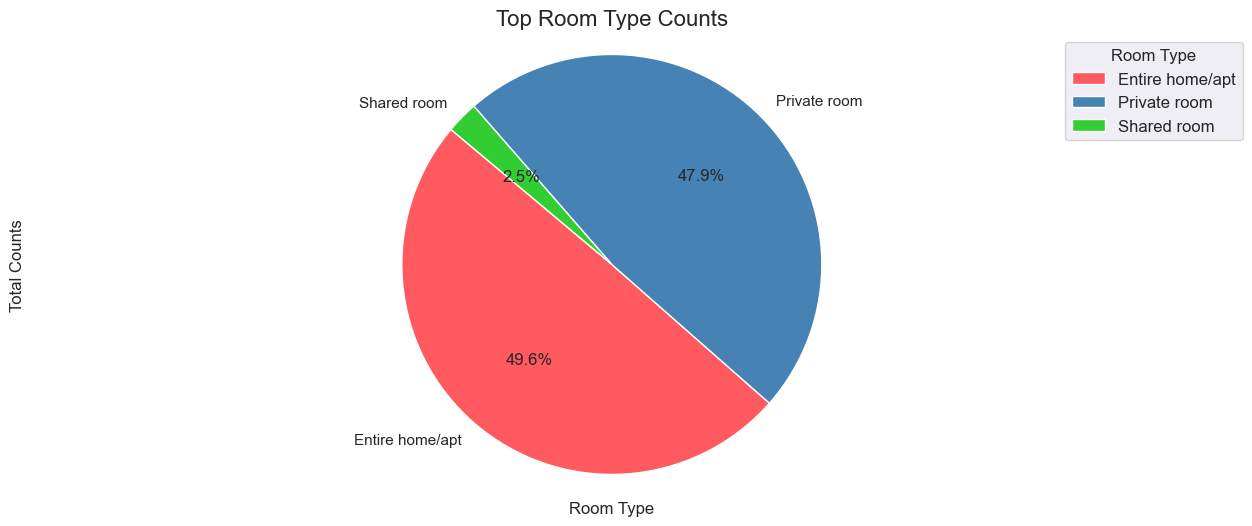

In [78]:
# Creating a pie chart to show total counts of each room type.

import matplotlib.pyplot as plt

labels = top_room_type['Room_Type']

sizes = top_room_type['Total_counts']

plt.figure(figsize=(15, 6))

plt.pie(sizes, labels=labels, colors=['#FF5A5F',  '#4682B4', '#32CD32'], 
        autopct='%1.1f%%',startangle=140)

plt.title('Top Room Type Counts', fontsize=16)

plt.xlabel('Room Type', fontsize=12)

plt.ylabel('Total Counts', fontsize=12)

plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), fontsize=12)

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.show()

<font size=6>**Insights**</font>

- **Most people prefer renting entire homes or apartments, with 22,789 listings, followed by private rooms at 21,996.**

- **Shared rooms are much less common, with only 1,138 listings.**

- **This shows that most guests like having their own space, while only a few choose shared rooms.**

- **There’s also a small group of budget travelers who go for shared rooms.**

**(9) Stay Requirement counts by Minimum Nights using Bar chart.**

In [81]:
# Group the dataframe by the minimum nights column and count the number of rows in each group.

min_nights_count = df_air.groupby('minimum_nights').size().reset_index(name = 'count')

# Sorting the resulting dataframe in descending order by the count column.

min_nights_count = min_nights_count.sort_values('count', ascending=False)

min_nights_count = min_nights_count.head(15).reset_index(drop=True)

min_nights_count

minimum_nights  count
0                1  12067
1                2  11080
2                3   7375
3               30   3493
4                4   3066
5                5   2821
6                7   1951
7                6    679
8               14    539
9               10    462
10              29    327
11              15    272
12              20    215
13              31    189
14              28    173

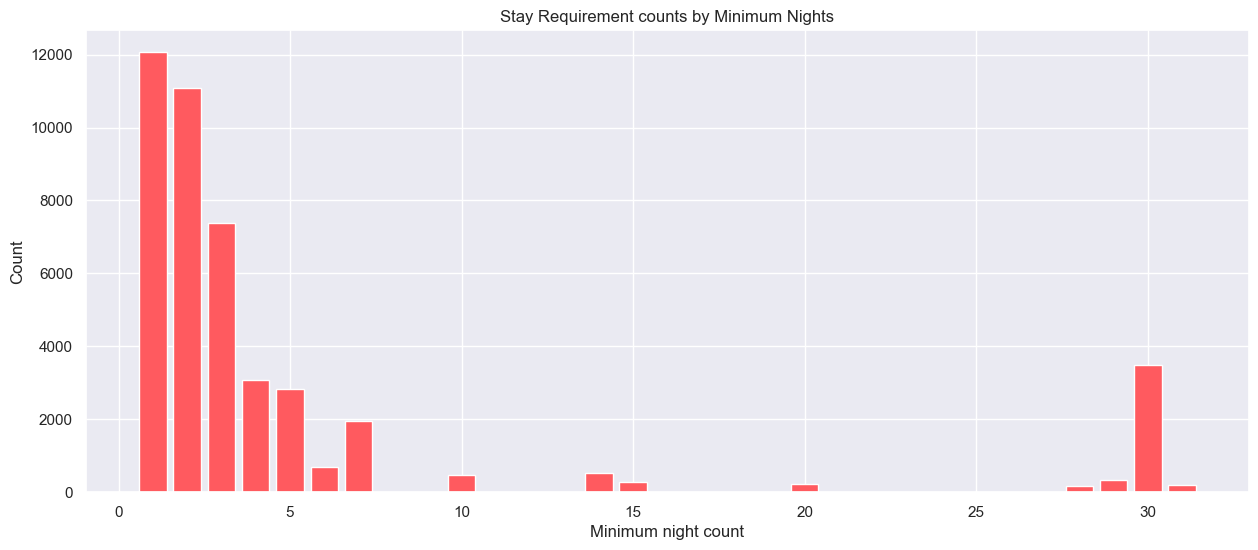

In [82]:
# Plotting bar chart to show Stay Requirement counts by Minimum Nights.

plt.figure(figsize=(15,6))

plt.bar(min_nights_count['minimum_nights'], min_nights_count['count'], color='#FF5A5F')

plt.xlabel('Minimum night count', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.title('Stay Requirement counts by Minimum Nights')

plt.show()

<font size=6>**Insights**</font>

- **The majority of listings on Airbnb have a minimum stay requirement of 1 or 2 nights, with 12067 and 11080 listings, respectively.**

- **The number of listings with a minimum stay requirement decreases as the length of stay increases, with 7375 listings requiring a minimum stay of 3 nights, and so on.**

- **There are relatively few listings with a minimum stay requirement of 30 nights or more, with 3493 and 189 listings, respectively.**

**(10) Total Reviews by Each Neighborhood Group using Pie Chart.**

In [85]:
# Group by neighbourhood group and sum the total reviews.

reviews_by_neighbourhood = df_air.groupby('neighbourhood_group')['number_of_reviews'].sum()

reviews_by_neighbourhood

neighbourhood_group
Bronx             28185
Brooklyn         475936
Manhattan        428143
Queens           155719
Staten Island     11536
Name: number_of_reviews, dtype: int64

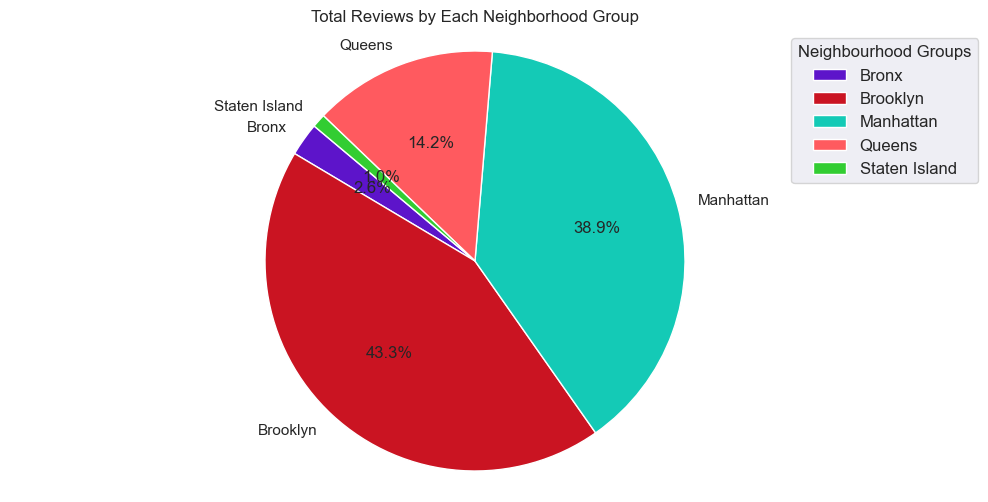

In [86]:
# Creating a pie chart to show total reviews by each neighbourhood group.

plt.figure(figsize=(12,6))

plt.pie(reviews_by_neighbourhood, labels=reviews_by_neighbourhood.index, 
        autopct = '%1.1f%%', 
        startangle=140,
        colors=['#5d14ca','#ca1422', '#14cab6', '#FF5A5F', '#32CD32'])
plt.title('Total Reviews by Each Neighborhood Group')

plt.legend(title='Neighbourhood Groups', bbox_to_anchor=(1.05, 1), fontsize=12)

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.show()

<font size=6>**Insights**</font>


- **Brooklyn has the largest share of total reviews on Airbnb, with 43.3%, followed by Manhattan with 38.9%.**

- **Queens has the third largest share of total reviews, with 14.2%, followed by the Bronx with 2.6% and Staten Island with 1.0%.**

- **The data suggests that Airbnb is more popular in Brooklyn and Manhattan compared to the other neighborhood groups.**

- **Brooklyn has more reviews than Manhattan, even though it has fewer listings. This could mean guests in Brooklyn are more likely to leave reviews or that the listings are more popular. Other factors like listing quality or guest types might also play a role.**

**(11) Number of Maximum Reviews by Each Neighborhood Group using Pie Chart.**

In [89]:
# Group the Airbnb data by neighbourhood group.

reviews_by_neighbourhood_group = df_air.groupby('neighbourhood_group')['number_of_reviews'].max()
reviews_by_neighbourhood_group

neighbourhood_group
Bronx            321
Brooklyn         488
Manhattan        607
Queens           629
Staten Island    333
Name: number_of_reviews, dtype: int64

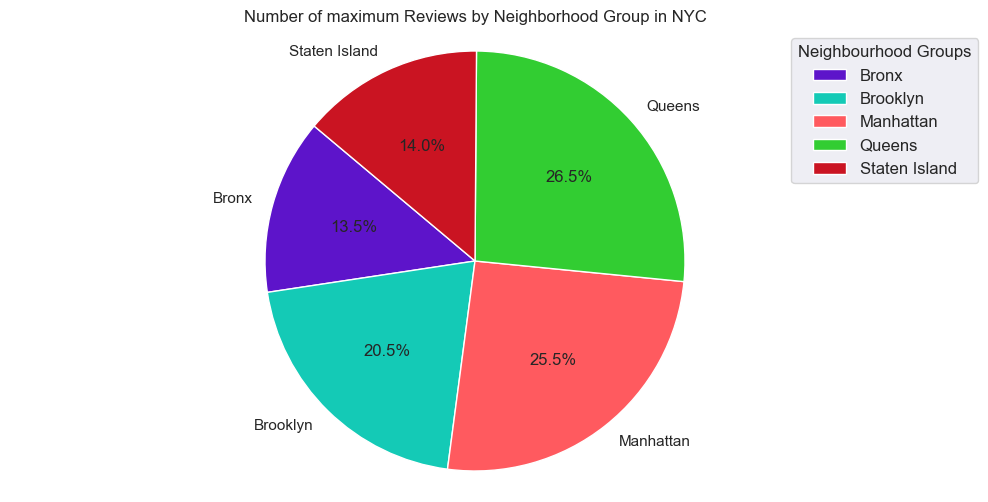

In [90]:
# Creating a pie chart to show number of maximum reviews by each neighbourhood group.

plt.figure(figsize=(12,6))

plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood.index, 
        autopct = '%1.1f%%', 
        startangle=140,
        colors=['#5d14ca', '#14cab6', '#FF5A5F', '#32CD32','#ca1422'])

plt.title("Number of maximum Reviews by Neighborhood Group in NYC")

plt.legend(title='Neighbourhood Groups', bbox_to_anchor=(1.05, 1), fontsize=12)

plt.axis('equal')

plt.show()

<font size=6>**Insights**</font>

- **Queens and Manhattan seem to be the most popular neighborhoods for reviewing, as they have both high number of maximum reviews.**

- **Queens and Manhattan seem to be the most popular neighborhoods for reviewing, as they have both high number of maximum reviews.**

- **Manhattan and Brooklyn also have a high percentage of reviews, at 25.5% & 20.5%.**

- **This indicates that Manhattan is a popular destination for tourists or visitors as well.**





**(12) Count Of Each Room Types In Entire NYC Using Multiple Bar Plot.**

In [93]:
# Group by neighbourhood and room type, and count the number of group occurs.

room_type_neighbourhood_counts = df_air.groupby(['neighbourhood_group', 'room_type']).size().unstack()
room_type_neighbourhood_counts

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            363           648           59
Brooklyn                        8942         10062          411
Manhattan                      11294          7747          465
Queens                          2022          3351          194
Staten Island                    168           188            9

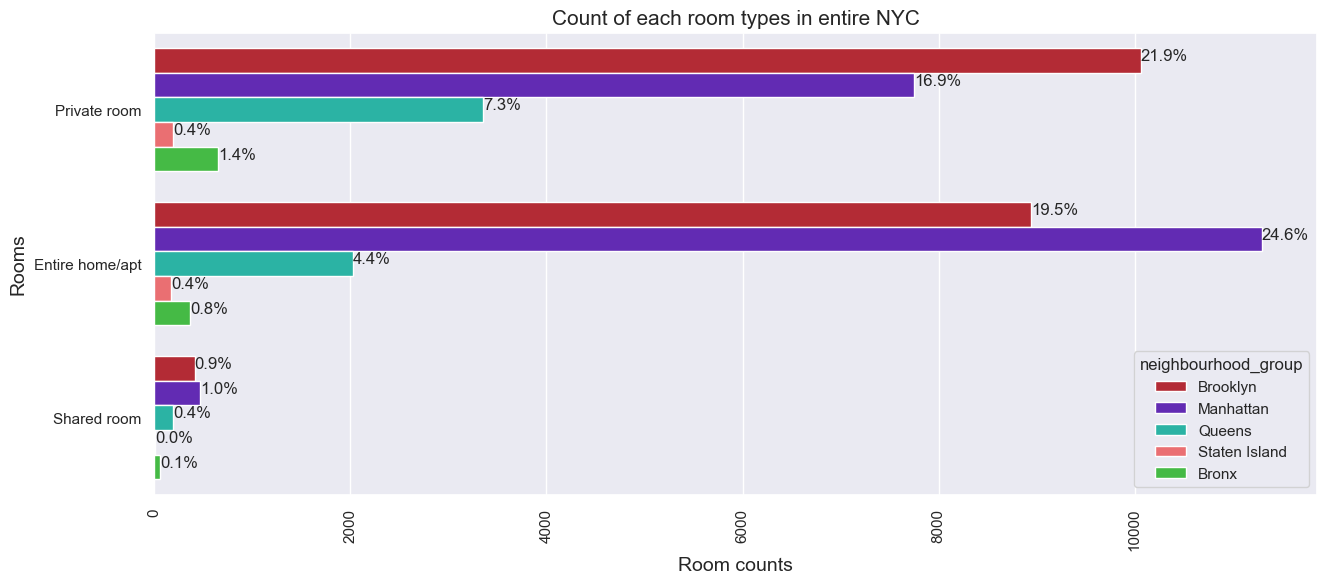

In [94]:
# Now analysis Room types count in Neighbourhood groups in NYC

plt.figure(figsize= (15,6))

ax = sns.countplot(y='room_type', hue='neighbourhood_group', data=df_air, palette=['#CA1422', '#5d14ca', '#14cab6', '#FF5A5F', '#32CD32'])

total = len(df_air['room_type'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in entire NYC', fontsize='15')

plt.xlabel('Room counts', fontsize='14')

plt.xticks(rotation=90)

plt.ylabel('Rooms', fontsize='14')

plt.show()

<font size=6>**Insights**</font>

- **Manhattan has more listed properties with Entire home/apt around 24.6% of total listed properties followed by Brooklyn with around 19.5%.**

- **Private rooms are more in Brooklyn as in 21.9% of the total listed properties followed by Manhattan with 16.9% of them.**
- **While 7.3% of private rooms are from Queens.**

- **Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.**

- **We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.**

**(13) Price variations in NYC Neighbourhood groups using scatter plot.**


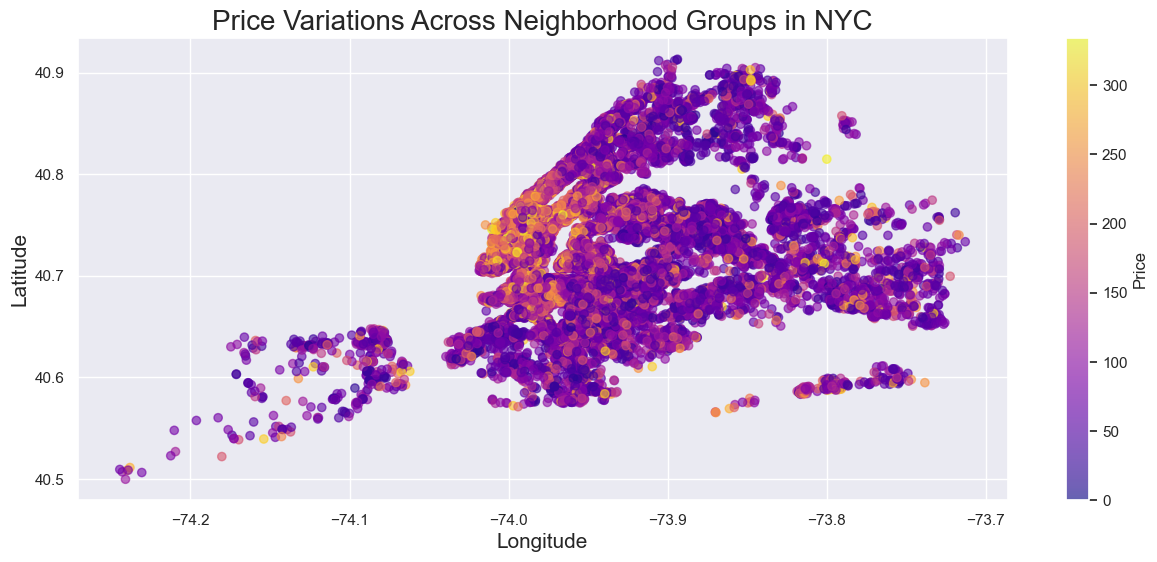

In [97]:
# Scatter plot to show price variations in NYC neighbourhood groups.

plt.figure(figsize=(15, 6))  

plt.scatter(df_air["longitude"], df_air["latitude"], c=df_air["price"], cmap="plasma", alpha=0.6)

plt.colorbar(label="Price")

plt.title("Price Variations Across Neighborhood Groups in NYC", fontsize=20)

plt.xlabel("Longitude", fontsize=15)

plt.ylabel("Latitude", fontsize=15)

plt.show()

<font size=6>**Insights**</font>

- **Manhattan has the highest accommodation prices in NYC, reflecting its popularity and abundance of attractions, amenities, and transportation options.**
- **This makes it a prime spot for tourists, who may choose to stay longer due to its convenience and appeal.**

**(14) Find Best Location Listing/Property Location For Travelers and Hosts.**

In [100]:
# Calculate the average number of reviews for each neighborhood

neighbourhood_reviews = df_air.groupby("neighbourhood")["number_of_reviews"].mean().reset_index()
neighbourhood_reviews.columns = ["neighbourhood", "avg_reviews"]

# Merge the average reviews data with the original DataFrame

df = df_air.merge(neighbourhood_reviews, on="neighbourhood")
neighbourhood_reviews

neighbourhood  avg_reviews
0           Allerton    42.878049
1      Arden Heights     7.750000
2           Arrochar    15.300000
3            Arverne    30.097222
4            Astoria    21.696731
..               ...          ...
214      Willowbrook     9.000000
215  Windsor Terrace    28.786667
216        Woodhaven    31.727273
217         Woodlawn    44.000000
218         Woodside    21.675325

[219 rows x 2 columns]

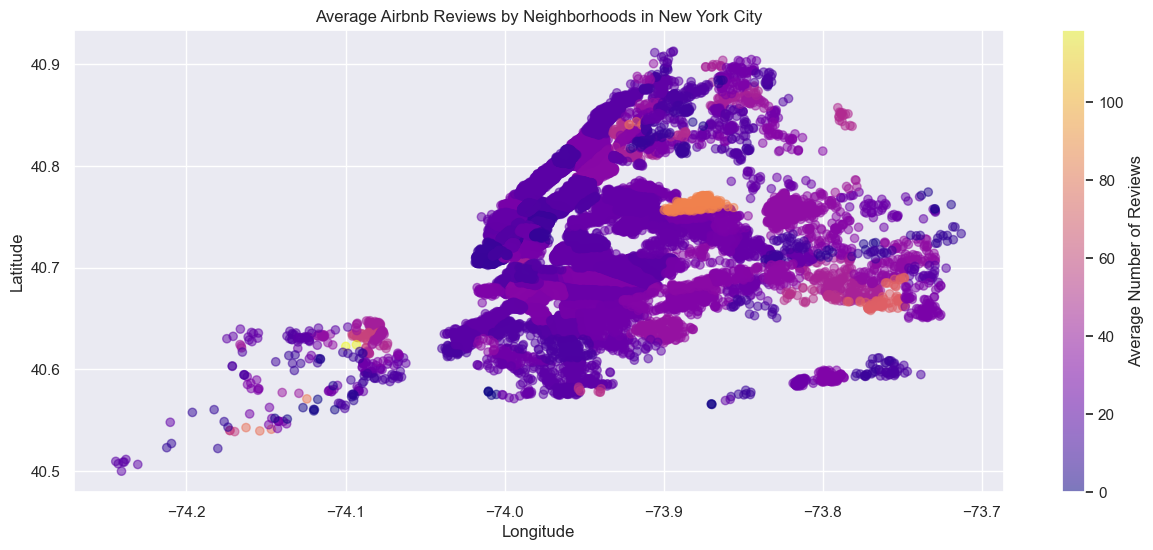

In [101]:
# Creating a scatter plot to show Best Location Listing/Property Location For Travelers and Hosts.

plt.figure(figsize=(15, 6))

plt.scatter(df["longitude"], df["latitude"], c=df["avg_reviews"], cmap="plasma", alpha=0.5)

plt.colorbar(label="Average Number of Reviews")

plt.title("Average Airbnb Reviews by Neighborhoods in New York City")

plt.xlabel("Longitude")

plt.ylabel("Latitude")

plt.show()

In [102]:
# Visualizing map of NYC to show major neighbhourhoods.
# Defining variable 'data' to store neighbourhoods and coordinates.
data = {
    'neighborhood': ['Brooklyn', 'Bronx', 'Staten Island', 'Queens', 'Manhattan'],
    'coordinates': [(40.6501, -73.9496), (40.8448, -73.8648), (40.5795, -74.1502), (40.7282, -73.7949), (40.7831, -73.9712)]
}
df_neighborhoods = pd.DataFrame(data)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

for name, (lat, lon) in zip(df_neighborhoods['neighborhood'], df_neighborhoods['coordinates']):
    folium.Marker(location=[lat, lon], popup=name).add_to(m)

m.save('nyc_neighborhoods_map.html')
m

<font size=6>**Insights**</font>

- **Neighborhoods near the airport in Queens have higher average reviews, likely due to their convenience for travelers passing through.**
- **Proximity to the airport, along with possible high-quality listings and nearby attractions, makes these areas appealing for short stays.**

**(15) Pair Plot Visualization**

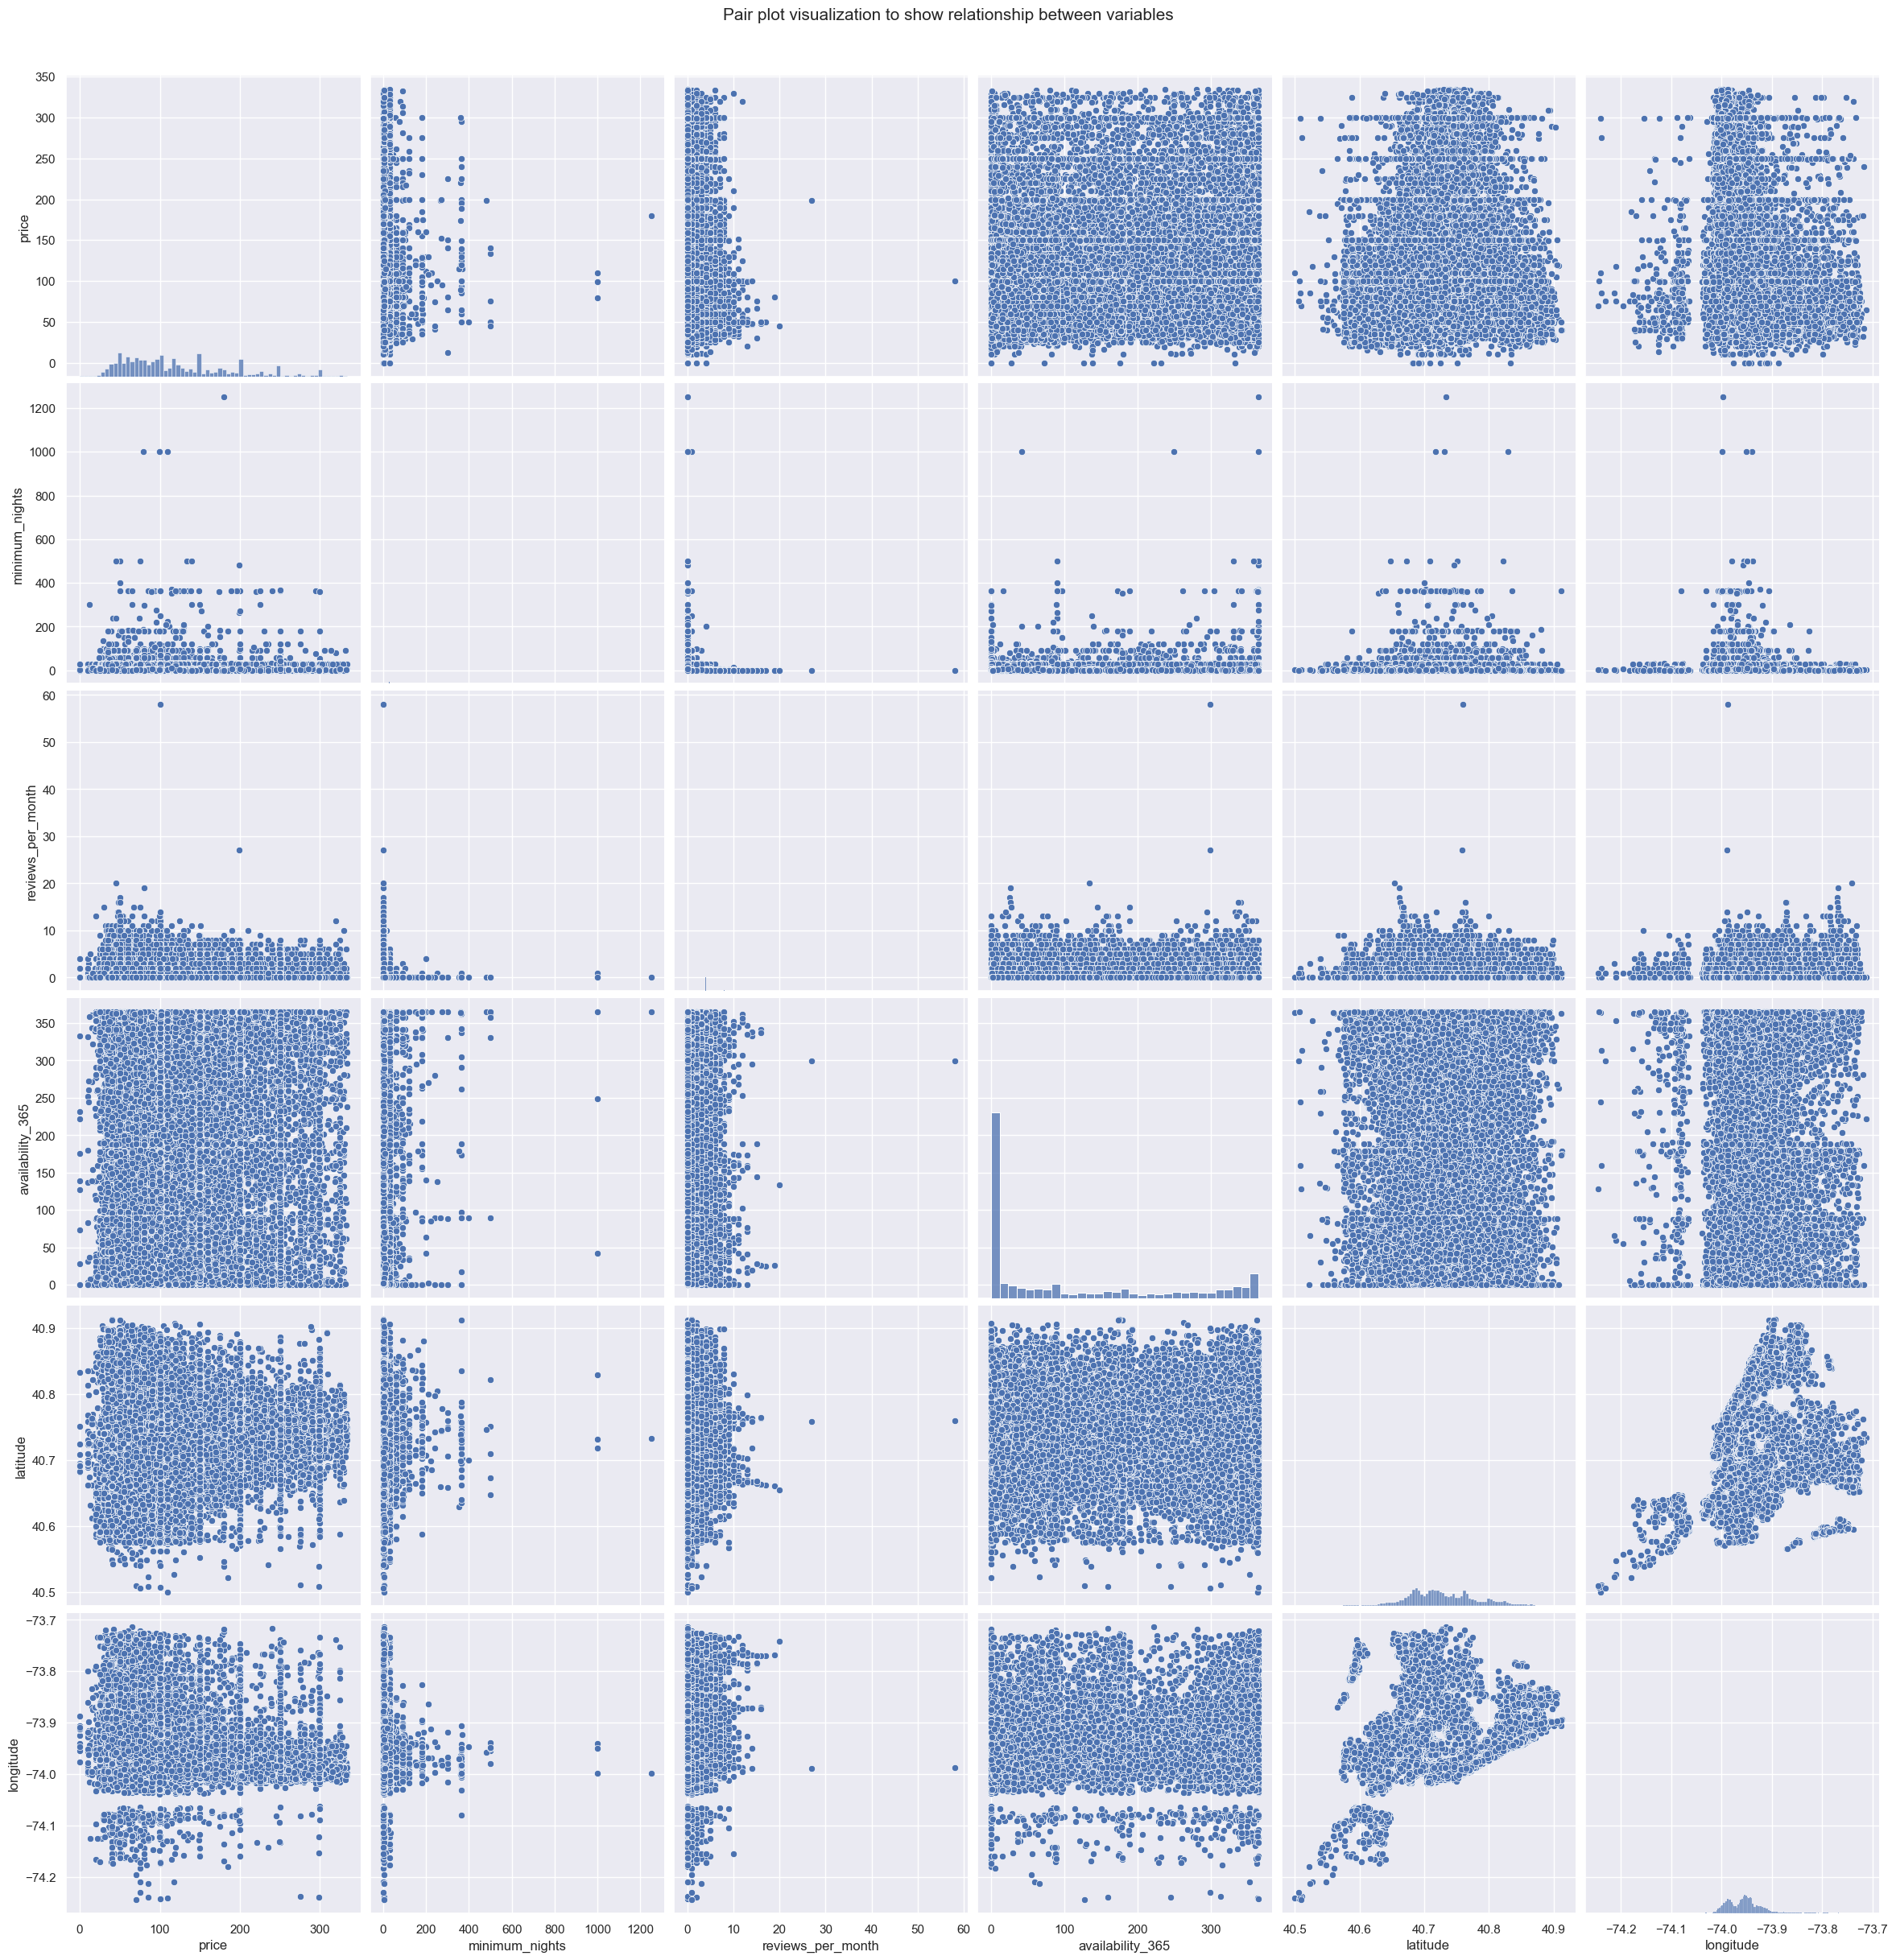

In [105]:
# Assuming df_air is already defined and contains the relevant data
warnings.filterwarnings("ignore", category=FutureWarning)

# Replace infinity values with NaN, if any exist in df_air
df_air.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Select the columns of interest including longitude and latitude
columns_of_interest = ['price', 'minimum_nights', 'reviews_per_month', 'availability_365', 'latitude', 'longitude']
df_selected = df_air[columns_of_interest]

# Create a pair plot for the selected columns
pairplot = sns.pairplot(df_selected, height=4)

# Set the title for the pair plot
pairplot.fig.suptitle('Pair plot visualization to show relationship between variables', fontsize=15, y=1.02)

# Show the plot
plt.show()

<font size=6>**Business Conclusion**</font>


- **Manhattan and Brooklyn have the highest demand for Airbnb rentals, as evidenced by the large number of listings in these neighborhoods. This could make them attractive areas for hosts to invest in property.**

- **Manhattan is world-famous for its parks, museums, buildings, town, liberty, gardens, markets, island and also its substantial number of tourists throughout the year ,it makes sense that demand and price both high.**

- **Brooklyn comes in second with significant number of listings and cheaper prices as compared to the Manhattan: With most listings located in Williamsburg and Bedford Stuyvesant two neighborhoods strategically close to Manhattan tourists get the chance to enjoy both boroughs equally while spending less.**

- **Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and the Upper West Side are the top neighborhoods in terms of listing counts, indicating strong demand for Airbnb rentals in these areas.**

- **The average price of a listing in New York City is higher in the center of the city (Manhattan) compared to the outer boroughs. This could indicate that investing in property in Manhattan may be more lucrative for Airbnb rentals. But Manhattan and Brooklyn have the largest number of hosts, indicating a high level of competition in these boroughs.**

- **The data suggests that Airbnb rentals are primarily used for short-term stays, with relatively few listings requiring a minimum stay of 30 nights or more. Hosts may want to consider investing in property that can accommodate shorter stays in order to maximize their occupancy rate.**

- **The majority of listings on Airbnb are for entire homes or apartments and also Private Rooms with relatively fewer listings for shared rooms. This suggests that travelers using Airbnb have a wide range of accommodation options to choose from, and hosts may want to consider investing in property that can accommodate multiple guests.**

- **The data indicates that the availability of Airbnb rentals varies significantly across neighborhoods, with some neighborhoods having a high concentration of listings and others having relatively few.**

- **The data indicates that there is a high level of competition among Airbnb hosts, with a small number of hosts dominating a large portion of the market. Hosts may want to consider investing in property in areas with relatively fewer listings in order to differentiate themselves from the competition.**

- **The neighborhoods near the airport in Queens would have a higher average number of reviews, as they are likely to attract a lot of tourists or visitors who are passing through the area. The proximity to the airport could make these neighborhoods a convenient and appealing place to stay for travelers for short-term stay with spending less money because The price distribution is high in Manhattan and Brooklyn.**